In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from logreg_train import describe_light, normalize_value, logreg
from bonus_logreg_train_miniBatchGD import logreg_minibatch
from bonus_stochastic import logreg_stochastic

In [56]:
def plot_algo_convergence(data_to_plot_slytherin, data_to_plot_ravenclaw, data_to_plot_gryffindor, data_to_plot_hufflepuff):
    plt.figure(figsize=(13, 13))
    plt.subplot(2, 2, 1)
    nb_plot_slytherin = len(data_to_plot_slytherin)
    x_slytherin = range(len(data_to_plot_slytherin[0][1]))
    for i in range(nb_plot_slytherin):
        plt.plot(x_slytherin, data_to_plot_slytherin[i][1], label = data_to_plot_slytherin[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Slytherin : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 2)
    nb_plot_ravenclaw = len(data_to_plot_ravenclaw)
    x_ravenclaw = range(len(data_to_plot_ravenclaw[0][1]))
    for i in range(nb_plot_ravenclaw):
        plt.plot(x_ravenclaw, data_to_plot_ravenclaw[i][1], label = data_to_plot_ravenclaw[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Ravenclaw : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 3)
    nb_plot_gryffindor = len(data_to_plot_gryffindor)
    x_gryffindor = range(len(data_to_plot_gryffindor[0][1]))
    for i in range(nb_plot_gryffindor):
        plt.plot(x_gryffindor, data_to_plot_gryffindor[i][1], label = data_to_plot_gryffindor[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Gryffindor : Cost vs gradient descent iteration")
    plt.legend()

    plt.subplot(2, 2, 4)
    nb_plot_hufflepuff = len(data_to_plot_hufflepuff)
    x_hufflepuff = range(len(data_to_plot_hufflepuff[0][1]))
    for i in range(nb_plot_hufflepuff):
        plt.plot(x_hufflepuff, data_to_plot_hufflepuff[i][1], label = data_to_plot_hufflepuff[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Hufflepuff : Cost vs gradient descent iteration")
    plt.legend()

    plt.show()

In [57]:
alpha = 0.1
lambda_ = 0.1
nb_iter = 200
nb_batch = 20

In [58]:
df_init = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")
col_to_delete = ["First Name", "Last Name", "Birthday", "Best Hand", "Astronomy",
                         "Arithmancy", "Care of Magical Creatures"]
df_init.drop(col_to_delete, axis=1, inplace=True)
stats = describe_light(df_init)
df = normalize_value(df_init)

In [59]:
w_miniBatch, b_miniBatch, result_miniBatch = logreg_minibatch(df, alpha, lambda_, nb_iter, nb_batch)

100%|██████████| 200/200 [01:58<00:00,  1.68it/s]


In [60]:
w, b, result = logreg(df, alpha, lambda_, nb_iter)

100%|██████████| 200/200 [02:00<00:00,  1.66it/s]


In [61]:
w_stocha, b_stocha, result_stocha = logreg_stochastic(df, alpha, lambda_, nb_iter)

100%|██████████| 200/200 [00:00<00:00, 10648.28it/s]

200


In [62]:
saved_result = []
saved_result.append(["Mini batch ", result_miniBatch[0], result_miniBatch[1], result_miniBatch[2], result_miniBatch[3]])
saved_result.append(["Batch ", result[0], result[1], result[2], result[3]])
saved_result.append(["Stochastic ", result_stocha[0], result_stocha[1], result_stocha[2], result_stocha[3]])

data_to_plot_slytherin = []
data_to_plot_ravenclaw = []
data_to_plot_gryffindor = []
data_to_plot_hufflepuff = []
for i in range(len(saved_result)):
    data_to_plot_slytherin.append([saved_result[i][0] + " Slytherin", saved_result[i][1]])
    data_to_plot_ravenclaw.append([saved_result[i][0] + " Ravenclaw", saved_result[i][2]])
    data_to_plot_gryffindor.append([saved_result[i][0] + " Gryffindor", saved_result[i][3]])
    data_to_plot_hufflepuff.append([saved_result[i][0] + " Hufflepuff", saved_result[i][4]])

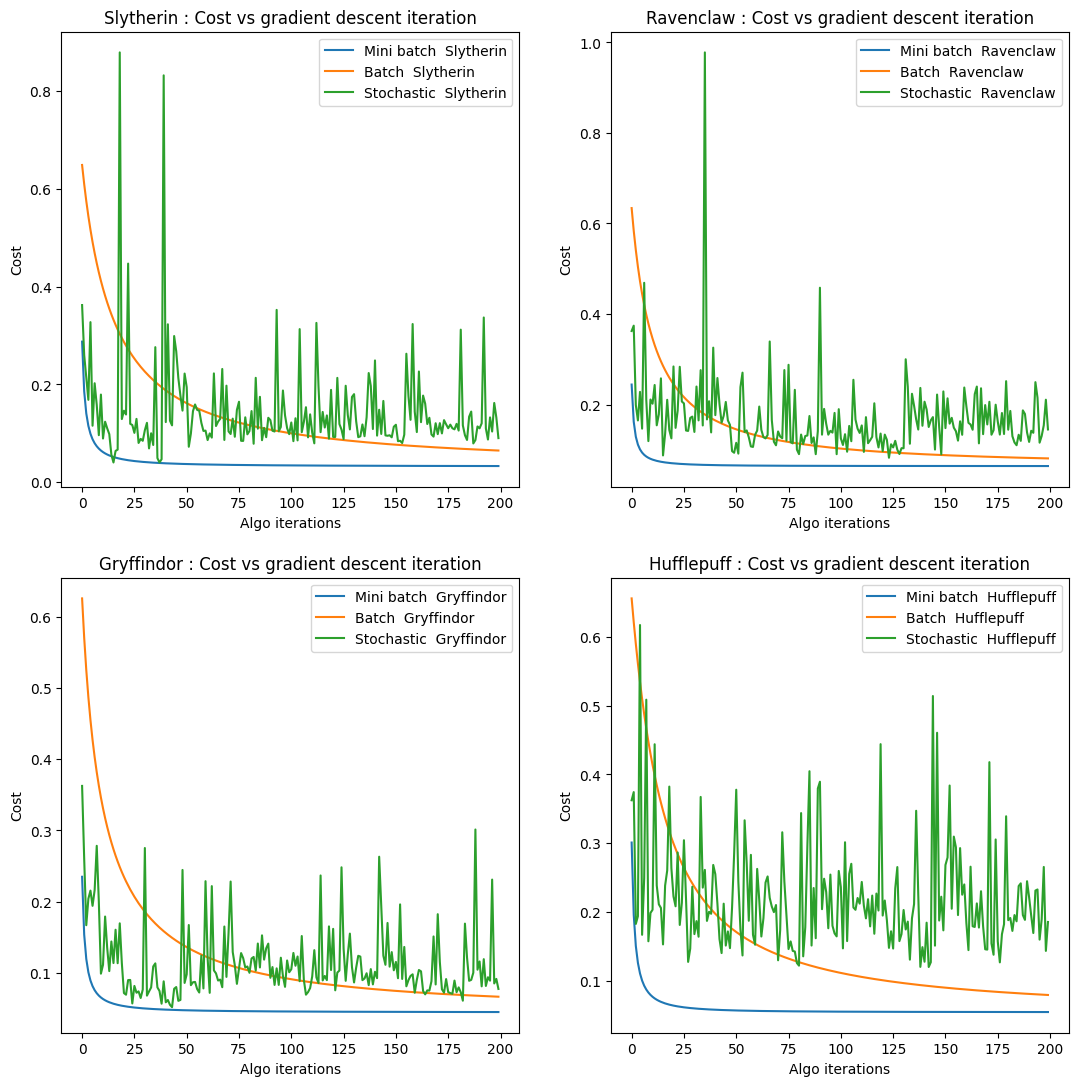

In [63]:
plot_algo_convergence(data_to_plot_slytherin, data_to_plot_ravenclaw, data_to_plot_gryffindor, data_to_plot_hufflepuff)